# Projeto 1 - Ciência dos Dados

Nome: Lucas Hix

## Pergunta a ser respondida

A entrada de um país em um bloco econômico que possui redução de tarifas em protudos agrículas, assim como em maquinário para produção, terá um efeito de aumentar a produção agrícula do pais por $km^2$ de área agrículas acima da média mundial?

Ultilizando como exemplo os paises membros das organizações intergovernamentais do mercosul e da união europeia

## Explicação da hipótese e mecanismo

A redução de tarifas na exportação de protudos agrículas e importação de maquinário para a produção dentro de um bloco econômico acaba permetindo que este país tenha um aumento de produção agricula em sua área agrícula maior que a do mundo uma vez que estas tarifas são muito mais vantajosas para este país do que acordos bilaterias com outros países permentido portando a aquisição de tecnologia para a produção além de um aumento na sua exportação.

[Artigo científico de base](https://www.questia.com/library/journal/1G1-65379114/potential-gains-from-reducing-trade-barriers-in-manufacturing)

## Bases de dados usadas

[World Agricultural land (sq. km)](https://data.worldbank.org/indicator/AG.LND.AGRI.K2) <p>
[World Cereal production (metric tons)](https://data.worldbank.org/indicator/AG.PRD.CREL.MT)

## Análise de dados

Insira abaixo uma análise de dados tratada para ter maior clareza. 

Lembre-se de que, além deste arquivo principal, você precisa entregar um ou mais *notebooks* mais brutos com todas as tentativas que fez e que não deram certo .

**Não inclua dados ou gráficos sem motivação nem interpretação** - sempre que fizer uma análise, plot ou tablea, diga qual sua intenção. Logo após a apresentação diga qual conclusão específica ou interpretação você tira daquela análise

In [1]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Tabelas Originais

lista_remover = ["ARB", "CEB", "CSS", "EAP", "EAR", "EAS", "ECA", "ECS", "EMU", "EUU", "FCS", "HIC", "HPC", "IBD",
                 "IBT", "IDA", "IDB", "IDX", "LAC", "LCN", "LDC", "LIC", "LMC", "LMY", "LTE", "MEA", "MIC", "MNA",
                 "NAC", "OED", "OSS", "PRE", "PSS", "PST", "SAS", "SSA", "SSF", "SST", "TEA", "TEC", "TLA", "TMN",
                 "TSA", "TSS", "UMC", "WLD", "INX"]

# Tabela da Área Rural

tabela_area_rural = pd.read_excel("Area Rural.xls", sheet_name="Data", skiprows=3)

i = 0

for tag in tabela_area_rural["Country Code"]:
    if tag in lista_remover:
        tabela_area_rural = tabela_area_rural.drop(index=i)
    i = i + 1
    
tabela_area_rural = tabela_area_rural.fillna(1);

# Tabela de Produção Agricula

tabela_producao_agricula = pd.read_excel("Producao Agricula.xls", sheet_name="Data", skiprows=3)

i = 0

for tag in tabela_producao_agricula["Country Code"]:
    if tag in lista_remover:
        tabela_producao_agricula = tabela_producao_agricula.drop(index=i)
    i = i + 1

tabela_producao_agricula = tabela_producao_agricula.fillna(0);

In [3]:
# Criando a Tabela que vai ser usada

data = pd.DataFrame(index=tabela_producao_agricula.index)

data["Country Name"] = tabela_producao_agricula["Country Name"]

for x in range(1961, 2017):
    data[x] = tabela_producao_agricula[str(x)]/tabela_area_rural[str(x)]

data = data.set_index("Country Name")
del data.index.name

data.head(3)

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Aruba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Afghanistan,9.801061,9.788136,8.934144,9.853986,9.993399,9.202648,10.073988,10.310690,10.627434,9.240646,...,15.262464,10.419414,17.182801,15.713118,12.347718,16.826695,17.199496,17.800382,15.325273,14.600111
Angola,0.951548,0.949301,0.900035,0.985153,0.981317,0.876091,0.898308,0.917273,1.129077,1.003336,...,1.353723,1.308218,1.813079,2.024223,2.395026,0.863782,2.829191,3.080649,3.412926,4.095849


In [4]:
# Funções

# Analisa a média de crecimento de um grupo de paises excluindo os dados que faltam (dado == 0)
# Retorna uma Series tendo como index os anos e a media de cada ano para este grupo de paises
def getMedia(tabela):
    lista_de_apoio = []

    for column in tabela.columns:
        count = 0
        total = 0

        for dado in tabela[column]:
            if dado > 0:
                total = total + dado
                count = count + 1

        lista_de_apoio.append(total/count)

    return pd.Series(index=tabela.columns, data=lista_de_apoio)

# Cria um plot ultilizando uma lista de Series
def mkPlot(lista, cores, nomes):
    i = 0

    for series in lista:
        plt.grid(True)
        plt.plot(series.index, series, color=cores[i], label=nomes[i])
        i = i + 1

# Função para mostrar um plot
def show(titulo, xlabel, ylabel):
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Cria uma reta da tentencia das médias de um grupo de paises (lista)
def retas(lista, cores, nomes, start=1961, end=1961):
    result = []
    
    i = 0

    start = start - 1961
    back_start = start
    end = end -1961

    if start < 0:
        start = 0

    for series in lista:
        if start > len(series):
            start = 0
        if end <= start:
            end = len(series)

        reset = series.reset_index()

        if end != start + 1:
            reset = reset.iloc[start:end]
            dados_x = reset["index"]
            dados_y = reset[0]
        else:
            dados_x = pd.Series(data=[reset["index"][start], reset["index"][end]])
            dados_y = pd.Series(data=[reset[0][start], reset[0][end]])
        
        a = dados_y.cov(dados_x) / dados_x.var()
        b = dados_y.mean() - a*dados_x.mean()

        plt.grid(True)
        plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=cores[i], label=nomes[i])
        
        result.append(a)
        i = i + 1

        start = back_start
    
    return result

def estudar_organizacao(lista, ano, name):
    pre_resultados = []
    
    # Tabela antes da entrada dos membros na organização
    pre = getMedia(data.loc[lista, ano>=data.columns])
    # Tabela apos a entrada dos membros na organização
    organizacao = getMedia(data.loc[lista, ano<=data.columns])
    
    # Plot dos dados analisados
    mkPlot([media_mundial, pre, organizacao], ["b", "r", "g"], ["Mundo", "Pré {0}".format(name), name])
    show("Média do crecimento por pais Mundo vrs {0}".format(name), "Ano", "Produção Agricula em Tonelada por km^2")

    # Plot da reta de crecimento dos pais num periodo de tempo comparada ao Mundo
    crecimentos = retas([media_mundial, pre], ["b", "r"], ["Mundo", "Pré {0}".format(name)], end=ano)
    show("Reta de crecimento por pais do Mundo vrs Pré {0}".format(name), "Ano", "Produção Agricula em Tonelada por km^2")

    # Calculando a difença do crecimento da reta dos paises antes da entrada com a do Mundo no mesmo periodo
    pre_resultados.append(["Pré {0} vrs Mundo".format(name), crecimentos[1] - crecimentos[0]])

    # Plot da reta de crecimento dos paises num periodo de tempo compara ao Mundo, neste caso dentro da organização
    crecimentos = retas([media_mundial, organizacao], ["b", "g"], ["Mundo", name], start=ano)
    show("Reta de crecimento do Mundo vrs {0}".format(name), "Ano", "Produção Agricula em Tonelada por km^2")

    # Calculando a diefença do crecimento da reta dos paises apos a entrada no Bloco com a do Mundo no mesmo Periodo
    pre_resultados.append(["{0} vrs Mundo".format(name), (crecimentos[1] - crecimentos[0])])
    
    # Grafico de Simulação para poder avalisar melhor a dirença de crecimento da entrada vrs antes
    
    anos = range(1, 100)
    simulacoes= []
    
    for dados in pre_resultados:
        print("A diferença do crecimento do {0} é de {1}".format(dados[0], dados[1]))
        
        i = 0
        simulacao = []
        
        for x in anos:
            simulacao.append(1000000 * ( 1 + dados[1] * i))
            i = i + 1
                
        simulacoes.append(pd.Series(index=anos, data=simulacao))
    
    mkPlot(simulacoes, ["r", "g"], ["Pré {0}".format(name), name])
    show("Difernça dos paises do {0} em relação ao crecimento do Mundo (SIMULADO)".format(name), "Ano Simulado", "Produção Agricula em Tonelada por km^2 Simulada")
    
    return pre_resultados

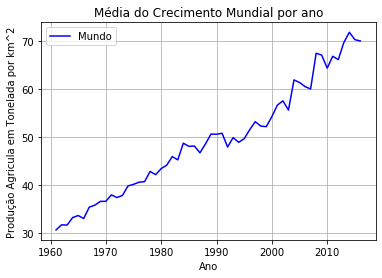

In [5]:
# Crecimento Mundial

media_mundial = getMedia(data)

mkPlot([media_mundial], ["b"], ["Mundo"])
show("Média do Crecimento Mundial por ano", "Ano", "Produção Agricula em Tonelada por km^2")

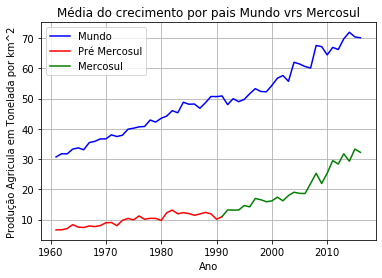

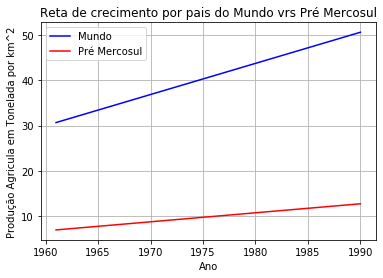

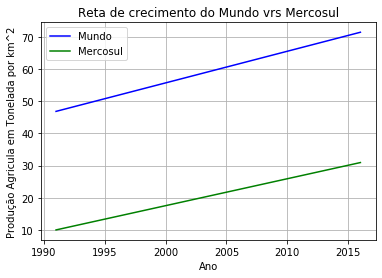

A diferença do crecimento do Pré Mercosul vrs Mundo é de -0.4890767535586996
A diferença do crecimento do Mercosul vrs Mundo é de -0.14652534921555804


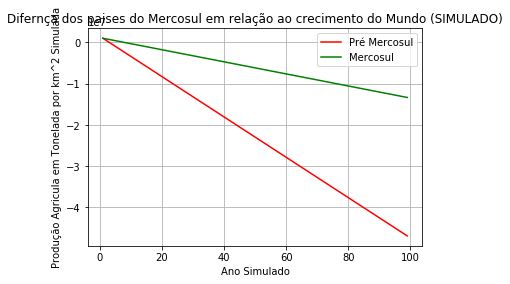

In [6]:
# Mercosul fundado em 1 de janeiro de 1991

ano = 1991
lista = ["Argentina", "Brazil", "Paraguay", "Uruguay"]
nome = "Mercosul"

estudar_organizacao(lista, ano, nome);

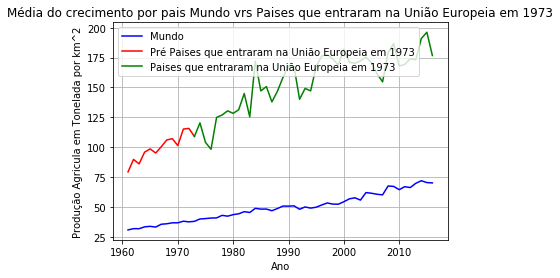

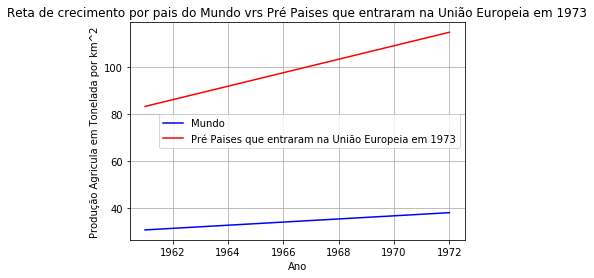

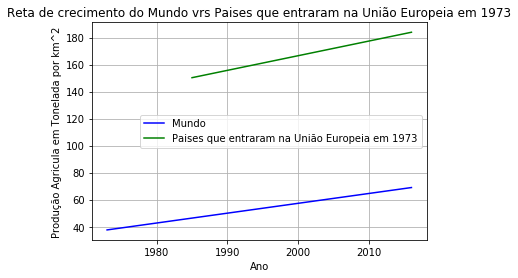

A diferença do crecimento do Pré Paises que entraram na União Europeia em 1973 vrs Mundo é de 2.2024840143216626
A diferença do crecimento do Paises que entraram na União Europeia em 1973 vrs Mundo é de 0.35559645400984574


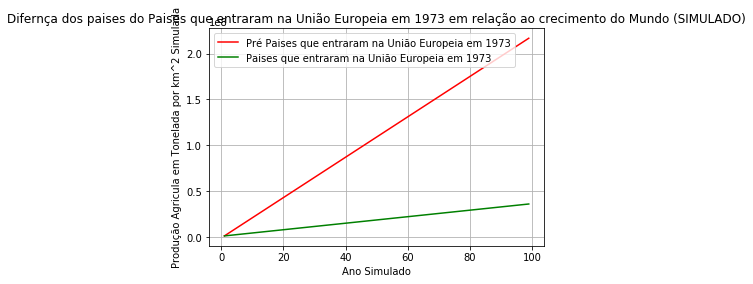

In [7]:
# União Europeia entrda de paises em 1 de janeiro de 1973

ano = 1973
lista = ("Denmark", "Ireland", "United Kingdom")
nome = "Paises que entraram na União Europeia em {0}".format(ano)

estudar_organizacao(lista, ano, nome);

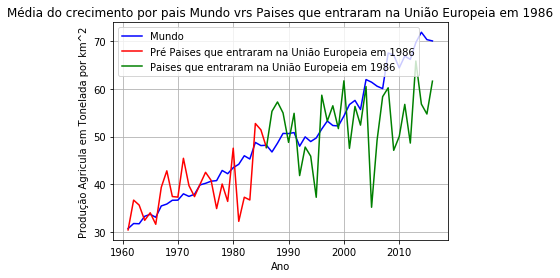

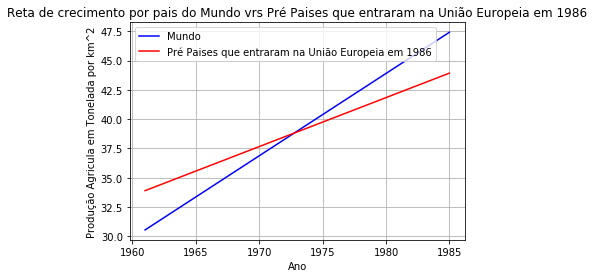

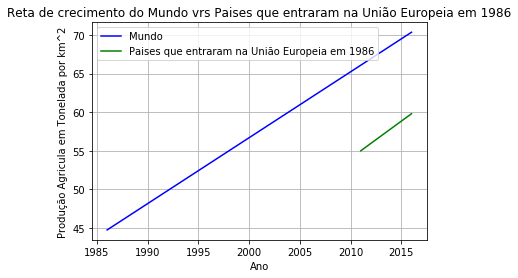

A diferença do crecimento do Pré Paises que entraram na União Europeia em 1986 vrs Mundo é de -0.2849412397647772
A diferença do crecimento do Paises que entraram na União Europeia em 1986 vrs Mundo é de 0.10694754917265725


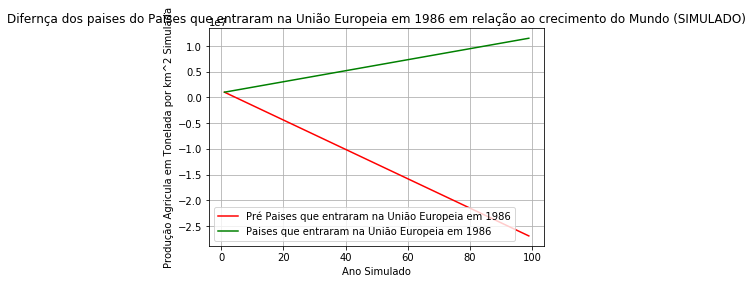

In [8]:
# União Europeia entrda de paises em 1 de janeiro de 1986

ano = 1986
lista = ("Portugal", "Spain")
nome = "Paises que entraram na União Europeia em {0}".format(ano)

estudar_organizacao(lista, ano, nome);

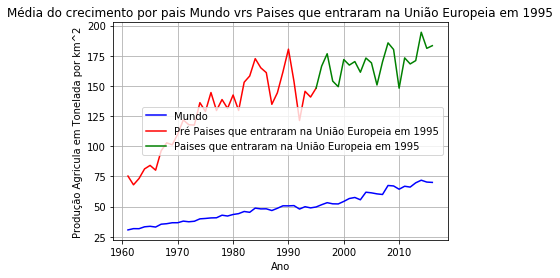

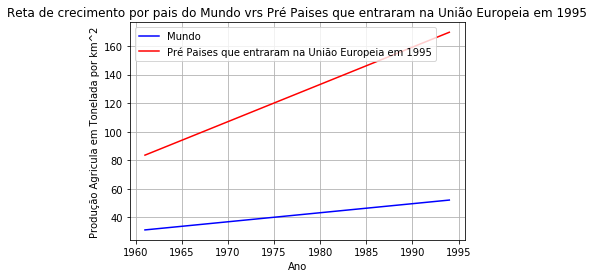

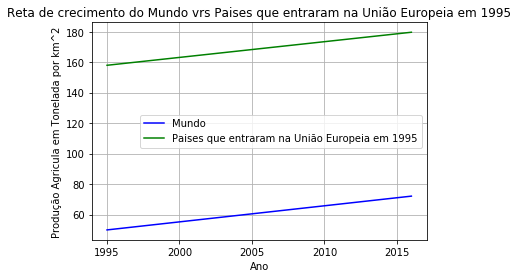

A diferença do crecimento do Pré Paises que entraram na União Europeia em 1995 vrs Mundo é de 1.9735595054178394
A diferença do crecimento do Paises que entraram na União Europeia em 1995 vrs Mundo é de -0.02321632615073166


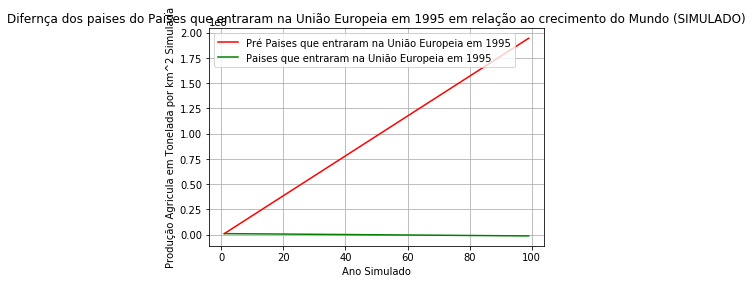

In [9]:
# União Europeia entrda de paises em 1 de janeiro de 1995

ano = 1995
lista = ("Austria", "Finland", "Sweden")
nome = "Paises que entraram na União Europeia em {0}".format(ano)

estudar_organizacao(lista, ano, nome);

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:805: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_lowerdim(tup)


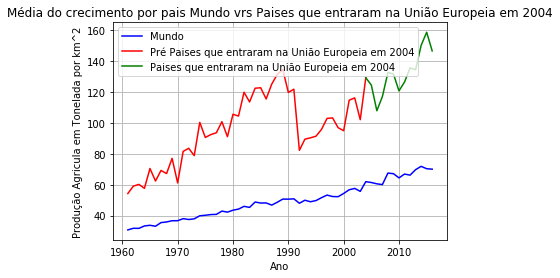

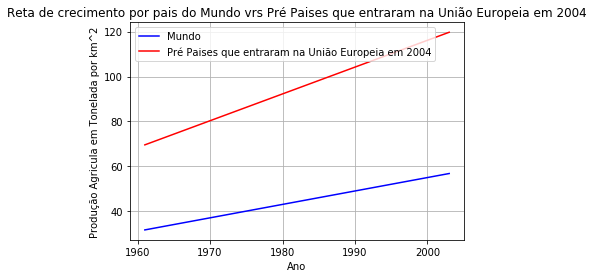

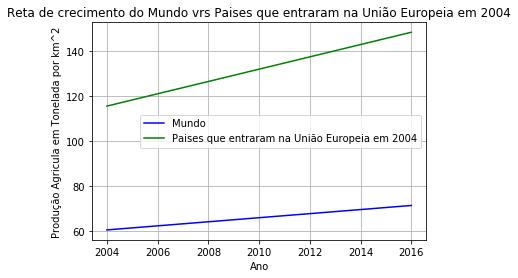

A diferença do crecimento do Pré Paises que entraram na União Europeia em 2004 vrs Mundo é de 0.5964775638008971
A diferença do crecimento do Paises que entraram na União Europeia em 2004 vrs Mundo é de 1.8298391898813433


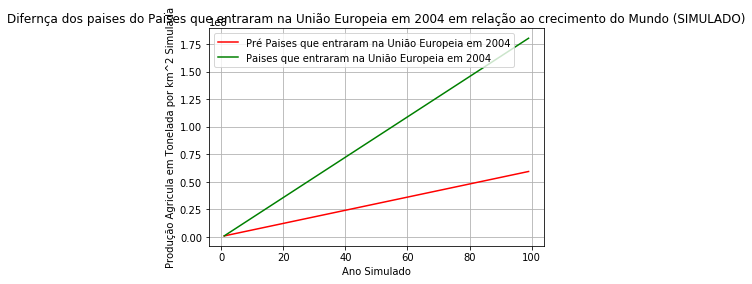

In [10]:
# União Europeia entrda de paises em 1 de maio de 2004

ano = 2004
lista = ("Czechia", "Cyprus", "Estonia", "Hungary", "Latvia", "Lithuania", "Malta", "Poland", "Slovakia", "Slovenia")
nome = "Paises que entraram na União Europeia em {0}".format(ano)

estudar_organizacao(lista, ano, nome);

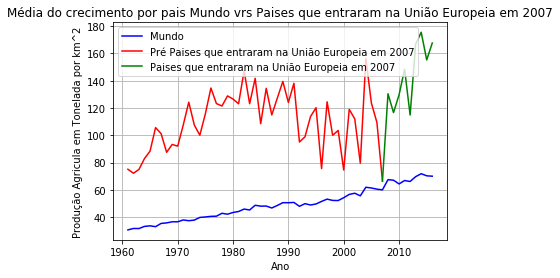

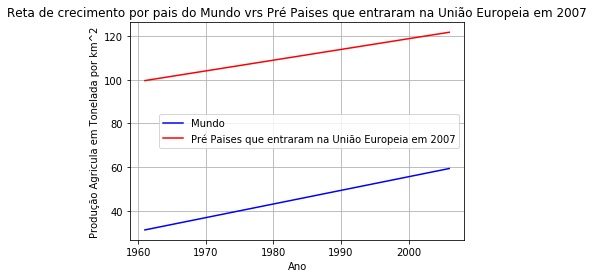

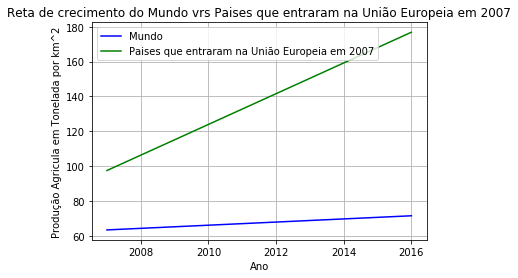

A diferença do crecimento do Pré Paises que entraram na União Europeia em 2007 vrs Mundo é de -0.13291958853083558
A diferença do crecimento do Paises que entraram na União Europeia em 2007 vrs Mundo é de 7.922164772139174


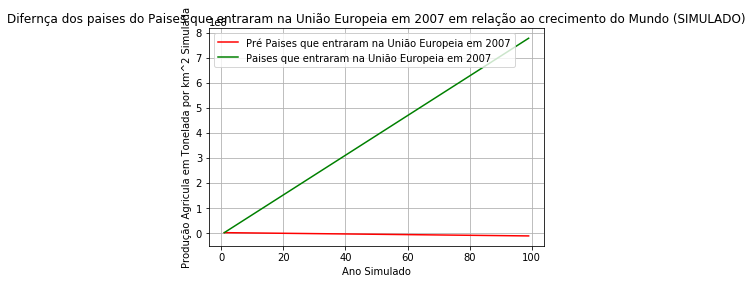

In [11]:
# União Europeia entrda de paises em 1 de janeiro de 2007

ano = 2007
lista = ("Bulgaria", "Romania")
nome = "Paises que entraram na União Europeia em {0}".format(ano)

estudar_organizacao(lista, ano, nome);

## Conclusão

Após analisar os dados ultilizando gráficos simulados pode-se concluir que a entrada de um país em um bloco económico tem a tendência de fazer com que seu crecimento de produção agrícula por $km^2$ médio por ano seja maior do que sem o bloco económico. Isso pode ser visto com mais evidência com países em estado de "Desenvolvimento", provavelmente como sua economia se baseia na exportação destes produtos a redução das tarifas na exportação entre os membros do bloco acaba por incentivar este setor, aumentando seu crecimento.